<a href="https://colab.research.google.com/github/LEEGWONSEOK/CSAI_assignment/blob/main/Dacon%5B%EC%9D%B4%EA%B6%8C%EC%84%9D%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **데이콘 주제: 유형별 임대주택 설계 시 단지 내 적정 주차 수요를 예측**

**주제 :** 유형별 임대주택 설계 시 단지내 적정 주차 수요를 예측하라

<br>

### **DataSet Description**

|Column Name|Description|Type|etc.|
|---|---|---|---|
|**등록차량수(Target)**|아파트 단지 내 주차대수 (목적)|||
|**단지코드**|단지코드가 같으면 같은 하나의 아파트 (목적이 한단지 내에 필요한 주차대수. 그래서 중요한 피쳐로 판단) |범주/분류||
|**총세대수**|단지에 거주하는 세대의 수 (주차대수가 세대수에 따라서도 달라져서 중요한 피쳐)|범주/분류||
|**임대건물구분**|아파트/상가 두개의 범주로 구성되어 있고 범주에 따른 주차대수가 다를것 같음|범주/분류|2개(상가/아파트)|
|**지역**|16개의 특별시,광역시와 '도'로 구분되어있음 (지역별 주차대수가 유의한 차이가 있는지 검증해야할것같음 --> ANOVA검증)|범주/분류|16개(팔도/광역시/특별구역)|
|**공급유형**|공공임대, 영구임대, 등 10개의 유형이 있음 (같은 유형이어도 10년임대, 50년임대, 분납 이런식으로 구성되어있어서 범주를 줄이기 위한 전처리 고민)|범주/분류|10개|
|**전용면적**|집 평수에 해당하며 같은 아파트에도 각기 다름|||
|**전용면적별 세대수**|단지 내 평수가 같은 세대의 숫자(하지만 같은아파트에서 전용면적도 같지만 세대수가 나뉘어져 있는 경우가 있음.check)|||
|**공가 수**|공가는 빈집이라는 뜻으로 빈집의 수라고 보면 됨(세대수가 많더라도 공가수가 많으면 주차 대수가 낮아져야함)|||
|**자격유형**|A~O까지 15개의 유형이 있음|범주/분류|15개(A~O)|
|**임대보증금**|임대보증금 (단지내 전용면적별로 임대보증금이 다름)|순서/회귀||
|**임대료**|임대료(마찬가지로 단지내 전용면적별로 임대로가 다른데 보통 임대보증금과 비례하기 때문에 임대보증금과 임대료중에 하나를 drop해도 될것같음)|순서/회귀||
|**지하철(역세권)**|지하철이 멀리 있으면 집에서 자차를 보유할 확률이 높은지 검증|순서/분류|4개(0,1,2,3)|
|**버스(역세권)**|버스정류장이 멀리 있으면 집에서 자차를 보유할 확률이 높은지 검증<br>(지하철과 버스정류장중에 어떤것이 더 주차대수에 관계가 있는지 검증 할 수 있는 방법 생각해보기, 둘다 가까이 / 지하철만 가까이 / 버스정류장만 가까이 / 둘다 없음|순서/분류|17개|
|**단지내 주차면수**|단지별로 최대 주차수용 수|||
|**age_gender_info**|지역별 나이의 비율을 표시함(train, test에 어떤식으로 데이터를 추가할 지 생각해봐야함)|||

#### 공급유형

- 국민임대 : 국가재정 + 국민주택기금 지원받아 국가 지방자치단체 한국토지주택공사 또는 지방공사가 건설 공급하는 주택
- 임대상가
- 행복주택    
- 공공임대 : 5년 또는 10년 후 임대기간이 종료될 경우 입주자에게 우선 분양전환을 실시하는 주택
- 공공분양 : 
- 영구임대
- 장기전세

레퍼런스 : http://www.meconomynews.com/news/articleView.html?idxno=11970

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,656 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

### **1팀 맴버**

- 권재우, 류태규, 이권석, 김승환

<br>

### **추가 의견**

- 추가로 데이터를 활용할 수 있는 방안도 고려
- 개인적인 생각으로는 피쳐의 수가 많지 않기 때문에 전처리에는 한계가 있음 그래서 머신러닝 모델의 성능을 높이는데 주력해야 함

<br>

### **전처리 전략**

- 각자 데이터의 피쳐를 확인하고 타겟을 예측할 때 필요한 전처리를 생각해보기(많으면 많을 수록 좋음)

<br>

### **모델개발 전략**

- 초반 데이터 전처리 _4명
- 모델개발 _2명, 추가 전처리 _ 2명
(XGBoost다음주 배움 , LightGBM,  **catboost** _ 하이퍼 파라미터)

<br>

### **평가산식 : MAE(Mean Absolute Error)**

- Public 평가 : 전체 Test 데이터 중 무작위 33% (50단지)
- Private 평가 : 전체 Test 데이터 중 나머지 67% (100단지)

<br>

### **데이콘 공지** 

+ 아파트 단지 내 필요한 주차대수는 

  ①법정주차대수 ②장래주차수요 중 큰 값에 따라 결정하게되어 있어, 정확한 ②장래주차수요의 산정을 필요로 함
+ 현재 ②장래주차수요는 ‘주차원단위’와 ‘건축연면적’을 기초로하여 산출되고 있으며, ‘주차원단위’는 신규 건축예정 부지 인근의 유사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법으로 조사하고 있음
+ 이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제 건축시점과의 시간차 등의 문제로 과대 또는 과소 산정의 가능성을 배제할 수 없음

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/test.csv')
submission = pd.read_csv('https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/sample_submission.csv')
age_gender = pd.read_csv('https://raw.githubusercontent.com/ZeusKwon/data-drive/main/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94/age_gender_info.csv')

In [ ]:
train.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000,214270,0.0,3.0,1425.0,1015.0
8,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0


In [ ]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

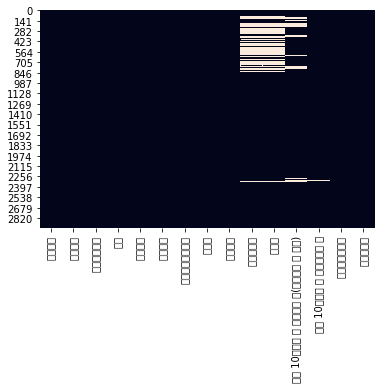

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

sns.heatmap(train.isnull(), cbar=False);

In [ ]:
def cleaning(df):

  ## column 명 변경
  df.rename(columns = {'도보 10분거리 내 지하철역 수(환승노선 수 반영)':'지하철(역세권)', '도보 10분거리 내 버스정류장 수':'버스(역세권)'}, inplace=True)
  
  ## 동일한 면적 합치기
  # 동일 단지코드별 전용면적별세대수 전체 합은 총세대수와 같은걸 알 수 있다. -> 전용면적별 세대수 합치기 


  ## 공가수 없애고 '공실률'로 변경(new column)
  #df['공실률'] =  100 - ((df['총세대수'] - df['공가수']) / df['총세대수'])*100
  df['실거주율'] =  ((df['총세대수'] - df['공가수']) / df['총세대수'])*100
  df.drop('공가수', axis=1, inplace=True)
  
  # 공가수의 숫자의 크기가 오히려 에러의 원인이 될꺼 같아서

  ## 결측치 제거
  #단지내 주차면수는 단지코드에 맞춰서 채워넣으면 될꺼 같고,
  #임대보증금이랑 임대료도 파악해봐야될꺼 같습니다.
  #지하철역도 확인

  return df

In [ ]:
train = cleaning(train)
test = cleaning(test)

train.head(10)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,자격유형,임대보증금,임대료,지하철(역세권),버스(역세권),단지내주차면수,등록차량수,실거주율
0,C2483,900,아파트,경상북도,국민임대,39.72,134,A,15667000,103680,0.0,3.0,1425.0,1015.0,95.777778
1,C2483,900,아파트,경상북도,국민임대,39.72,15,A,15667000,103680,0.0,3.0,1425.0,1015.0,95.777778
2,C2483,900,아파트,경상북도,국민임대,51.93,385,A,27304000,184330,0.0,3.0,1425.0,1015.0,95.777778
3,C2483,900,아파트,경상북도,국민임대,51.93,15,A,27304000,184330,0.0,3.0,1425.0,1015.0,95.777778
4,C2483,900,아파트,경상북도,국민임대,51.93,41,A,27304000,184330,0.0,3.0,1425.0,1015.0,95.777778
5,C2483,900,아파트,경상북도,국민임대,51.95,89,A,27304000,184330,0.0,3.0,1425.0,1015.0,95.777778
6,C2483,900,아파트,경상북도,국민임대,51.95,135,A,27304000,184330,0.0,3.0,1425.0,1015.0,95.777778
7,C2483,900,아파트,경상북도,국민임대,59.88,86,A,30357000,214270,0.0,3.0,1425.0,1015.0,95.777778
8,C2515,545,아파트,경상남도,국민임대,33.48,276,A,9216000,82940,0.0,3.0,624.0,205.0,96.880734
9,C2515,545,아파트,경상남도,국민임대,39.60,60,A,12672000,107130,0.0,3.0,624.0,205.0,96.880734


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

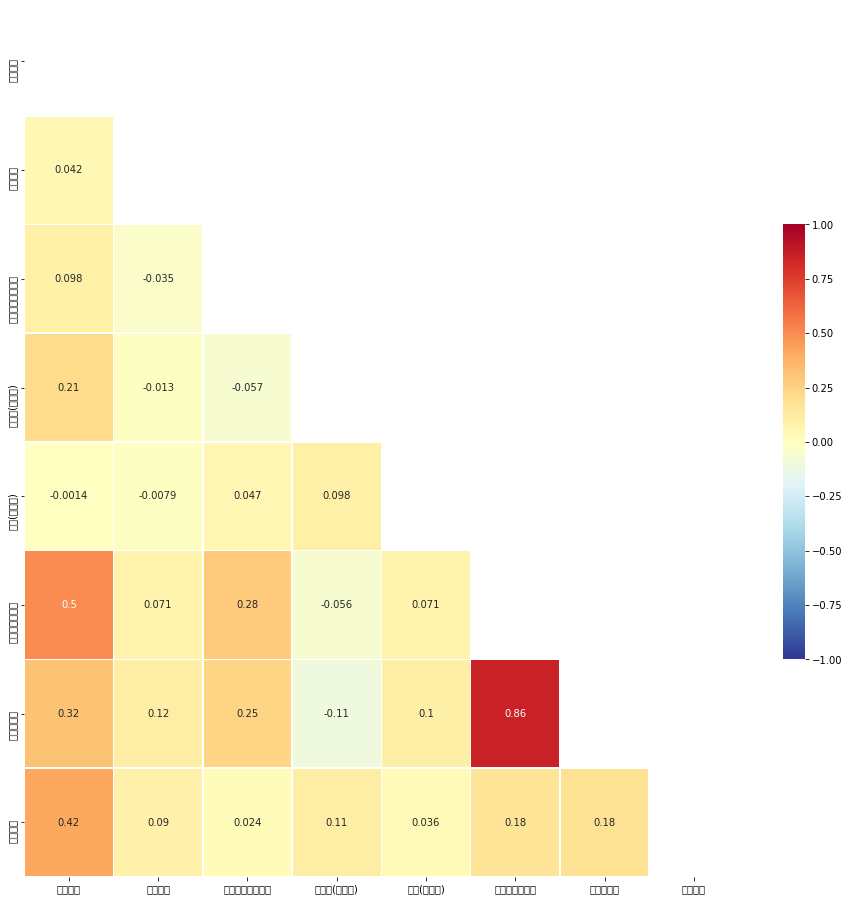

In [ ]:
## 상관관계 분석

df = train.corr()
fig, ax = plt.subplots(figsize=(16,16))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           );  
plt.show()

#### 인사이트

등록차량수와 상관관계가 높은 feature는 단지내 주차면수

# 2팀 개인 조사
### 재우
- 범주 : 8개
- 숫자 : 8개

 - 지역에 따른 인구분포가 어떤지 확인해보기
 - Train과 test 데이터 분포 확인하기
 - Train/Test 두 데이터에 서로 없는 데이터 체크해보기
 - 아파트/상가를 구분해서 데이터셋 만들어보기(근데 아파트 단지에 상가가 있는 경우가 있음. 구분해서 생각)
 - 단지코드, 임대보증금, 임대료가 높은 카디널리티를 보여주는데 보증금과 임대료를 합쳐서 범위를 줄여주는 작업이 필요함
 - 지하철역수, 임대보증금과 임대료에 결측값이 많은데 어떻게 처리해야할지 생각해보기
 - 자격유형이 D형인 아파트에만 결측치가 있는데 D형은 상가에만 있는 유형이다. 혹시 아파트로 자격유형이 D로 있으면 잘못 입력된 것은 아닌지 의심
 - 장기전세는 전세이기 때문에 임대료가 없음
 - 지하철이 없는 곳이 더 많지만 버스는 고르게 분포되어 있음
 - 전용면적을 평수로 바꾸기
 - 하나의 단지코드에 둘 이상의 값이 있는 변수들 처리
 - 국민임대/장기전세
   - (일반)해당지역 거주 무주택세대구성원
   - (특별/우선)3자녀 이상 가구
   - (특별/우선)국가유공자
   - (특별/우선)영구임대 입주자
   - (특별/우선)비닐간이공작물 거주자
   - (특별/우선)신혼부부(혼인기간 5년이내)
   - (특별/우선)사업지구 철거민
   - (특별/우선)기타 공급대상(고령자, 노부모부양자, 장애인, 파독근로자 등)
건수가 가장 많은 A는 해당지역 거주 무주택세대구성원으로 예상됨  
 - 공공임대(5년/10년/분납/분양)

   - (일반)해당지역 거주무주택세대구성원
   - (특별/우선)다자녀 특별
   - (특별/우선)신혼부부 특별
   - (특별/우선)생애최초 특별
   - (특별/우선)노부모부양 특별
   - (특별/우선)국가유공자 특별
   - (특별/우선)기타 특별(장애인, 철거민 등)
   - A는 '(일반)해당지역 거주무주택세대구성원'으로 추정됨

 - 행복주택
   - 대학생(취준생 포함), 사회초년생(제취준생 포함), 신혼부부(예비신혼부부, 대학생, 취준생 신혼부부 포함), 고령자, 주거급여수급자, 산업단지 근로자
   - 이렇게 6개 항목이랑 매핑 될듯
train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'(이런식으로 범주화 시키면 될듯)
  - 주차면수대비등록차량비율 = 등록차량수 / 단지내주차면수
  - 주차면수대비총세대수비율 = 총세대수 / 단지내주차면수
  - 거주율 = 1-(공가수 / 총세대수)
  - 거주율 대비 등록차량 비율
  - train set 데이터의 등록차량수 분포의 분산이 높다. 즉, outlier가 들어있을 가능성이 높다.
  - 마지막에 MAPE를 활용해서 모델 성능 확인하기


# 1팀 EDA 정리
- 단지코드 : 단지코드가 같으면 같은 하나의 아파트
(우리가 알아내야하는건 한 단지내에 필요한 주차대수임 그래서 중요한 피쳐가 될듯 )

- 지역 : 16개의 특별시,광역시와 '도'로 구분되어있음 (ex[서울과 경기도를 묶는다])
- 총 세대수 :  단지에 거주하는 세대의 수 ( 전용면적별 세대수와 관계 확인)
- 임대료 : 임대료(마찬가지로 단지내 전용면적별로 임대로가 다른데 보통 임대보증금과 비례하기 때문에 임대보증금과 임대료중에 하나를 drop해도 될것같음,
임대료 - 임대보증금 묶는다에 의견)
- 전용면적 : 집 평수에 해당하며 같은 아파트에도 각기 다름
16 -->5평
26.37-->7.976925평
33.48 -->10.1277평
46.9-->14.18725평
51.93 -->15.708825평
65.31-->19.756275평
74.91 -->22.660275평
84m2 --> 25.41평
- 임대건물 구분
아파트 : 2390 
상가 : 562
- 공급유형 정리
국민임댸 : 30년간의 임대기간이고 분양전환이 되지 않습니다.          

공공임대 : 임대기간 5년 , 10년 모집 이후 분양전환 

(년수별로 나눠져있는걸 확인 , 합치는게 좋아보임)

영구임대 : 분양전환이 불가한 영구임대                               

행복주택 : 젊은 층의 주거안정을 목적, 공공임대주택

공공분양 : 공적 사업주체가 부동산을 분양

임대상가 : 임대 상가

장기전세 : 청약저축 가입자를 대상으로 최장 임대기간 20년까지 거주할 수 있게 하는 장기전세 아파트.

- 자격유형
A : test에서는 국민임대,공공임대   , train에서는 국민임대,공공임대,장기전세,영구임대

B : test data X, train은 국민임대

C : 영구임대

D : 임대상가, 공공분양

E : train은 영구임대 , 국민임대 test는 국민임대

F : test data x train 영구임대

G : 국민임대

H : 국민임대

I : 영구임대

J,K,L,M,N,O : 행복주택  (O는 test data X)   

 ## 알파벳 앞 순으로 서울과 가까움
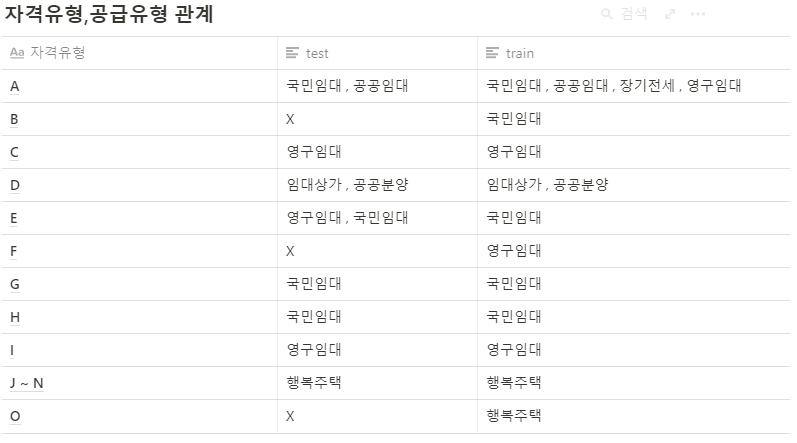
